In [1]:
# 加载包
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# 加载数据
## 2013-2015
xmoom_sale_2013_2015 = pd.read_csv("./data/xmoom_sale_2013_2015.CSV", 
                                   encoding = 'gb18030')
## 2016
xmoom_sale_2016 = pd.read_csv("./data/xmoom_sale_2016.CSV", 
                              encoding = 'gb18030')
### 最后一列是空的，剔除掉
xmoom_sale_2016 = xmoom_sale_2016.iloc[:,0:30]
## 2017
xmoom_sale_2017 = pd.read_csv("./data/xmoom_sale_2017.CSV", 
                              encoding = 'gb18030')
### 最后一列是空的，剔除掉
xmoom_sale_2017 = xmoom_sale_2017.iloc[:,0:30]
## 2018Q1
xmoom_sale_2018Q1 = pd.read_csv("./data/xmoom_sale_2018Q1.CSV", 
                                encoding = 'gb18030')
### 最后一列是空的，剔除掉
xmoom_sale_2018Q1 = xmoom_sale_2018Q1.iloc[:,0:42]

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# 处理数据
## 把2013-2017共5年的数据合并
xmoom_sale_2013_2017 = xmoom_sale_2013_2015.append(xmoom_sale_2016).append(xmoom_sale_2017)

In [9]:
xmoom_sale_2018Q1.head()

,年,月,日期,渠道名称,区域名称,客户代码,客户名称,类别名称,客户类别,单位,...,波段名称.1,小类名称,季节名称,颜色名称,尺码名称,数量,选定金额,成本金额,实际金额,结算额
0,2018,1.0,2018-01-01,总部,东北区,B205,沈阳尚柏奥莱,自营,2.0,件,...,冬一波,AA套衫,17年冬季,33大红,M,1.0,1290.0,0.0,774.0,681.12
1,2018,1.0,2018-01-01,总部,东北区,B205,沈阳尚柏奥莱,自营,2.0,件,...,春三波,CD长袖衬衫,17年春季,55藏蓝,L,1.0,1090.0,0.0,458.0,403.04
2,2018,1.0,2018-01-01,总部,东北区,B205,沈阳尚柏奥莱,自营,2.0,件,...,未定义,DC长大衣,17年冬季,58藏青,M,-1.0,-3690.0,0.0,-1476.0,-1298.88
3,2018,1.0,2018-01-01,总部,东北区,B205,沈阳尚柏奥莱,自营,2.0,件,...,未定义,DC长大衣,17年冬季,58藏青,M,1.0,3690.0,0.0,1476.0,1298.88
4,2018,1.0,2018-01-01,总部,东北区,B205,沈阳尚柏奥莱,自营,2.0,件,...,未定义,DC长大衣,17年冬季,58藏青,S,1.0,3690.0,0.0,1476.0,1298.88


In [10]:
xmoom_sale_2013_2015.head(2)

,年,月,日期,渠道名称,区域名称,客户代码,客户名称,类别名称,客户类别,单据编号,...,设计师名称,季节名称,商品年份,商品名称,单据类型,商品代码,数量,选定金额,实际金额,结算额
0,2013,1,2013-01-01,北京分部,未定义,B098,天津伊势丹,托管,3,LA1B098000989,...,未定义,11年冬季,2011,短款羽绒衣,零售销货单,HKDYB5409,1,2590,1295.0,1295.0
1,2013,1,2013-01-01,北京分部,未定义,B098,天津伊势丹,托管,3,LA1B098000989,...,未定义,11年冬季,2011,长款羽绒衣,零售销货单,HKDYC5334,2,5980,2990.0,2990.0


In [30]:
xmoom_total_sale_1317 = xmoom_sale_2013_2017.groupby('年').实际金额.sum()
xmoom_total_sale_1317.rename(columns = {'year','sale'}, 
                             replace = True)

年
2013   39,191,860
2014   31,971,826
2015   44,435,044
2016   59,883,133
2017   82,381,047
dtype: float64

In [33]:
np.dtype(xmoom_total_sale_1317)

dtype('float64')

In [31]:
xmoom_total_sale_1317

年
2013   39,191,860
2014   31,971,826
2015   44,435,044
2016   59,883,133
2017   82,381,047
Name: 实际金额, dtype: float64

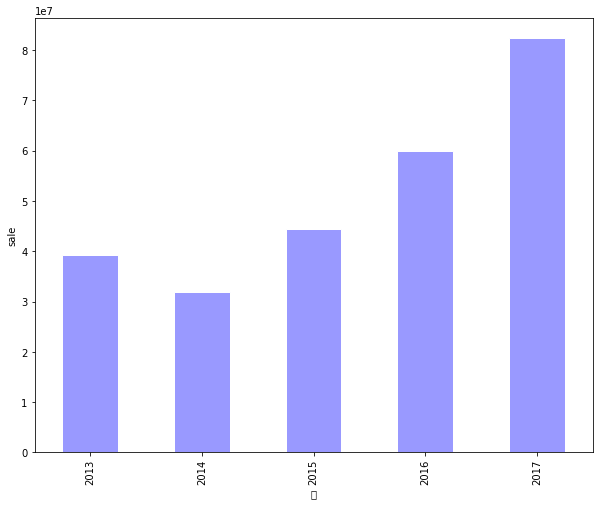

In [25]:
pd.options.display.float_format = '{:,.0f}'.format
xmoom_total_sale_1317 = xmoom_sale_2013_2017.groupby('年').实际金额.sum()
%matplotlib inline
plt.figure(figsize = (10, 8))

.plot(kind = 'bar', 
                                                     facecolor = '#9999ff', 
                                                     edgecolor = 'white')
plt.ylabel('sale')
# 添加数据标签
X = xmoom_sale_2013_2017.年
for x, y in zip(X, y1):
    # ha:horizontal alignment
    # va:vertical alignment
    plt.text(x, y + 0.04, '%.2f' % y, ha = 'center', va = 'bottom')
plt.show()

In [14]:
xmoom_sale_2013_2017.groupby('年','客户名称').实际金额.sum()

ValueError: No axis named 客户名称 for object type <class 'pandas.core.frame.DataFrame'>